In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tensorflow import keras

2024-05-21 01:55:01.837023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 01:55:02.569174: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-21 01:55:02.569204: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-21 01:55:05.841627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

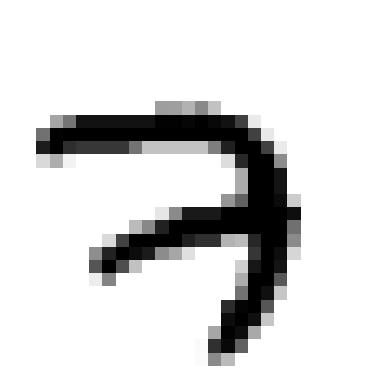

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

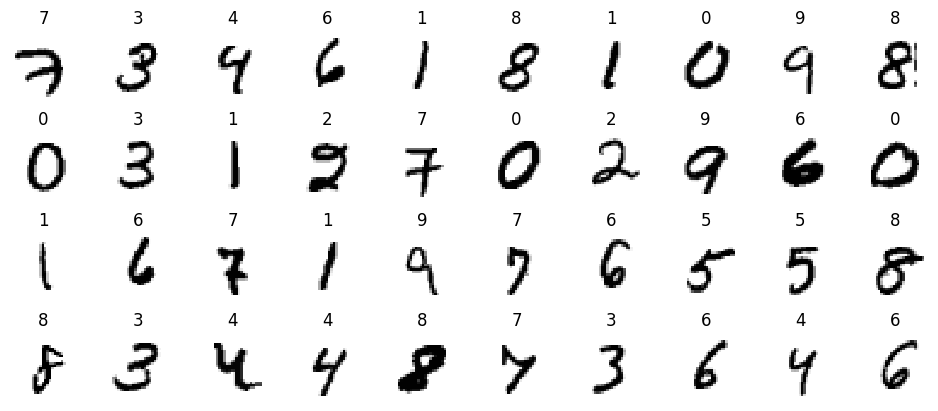

In [6]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [8]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2024-05-21 01:55:12.216001: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-21 01:55:12.216429: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-21 01:55:12.216463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kjUbuntu): /proc/driver/nvidia/version does not exist
2024-05-21 01:55:12.217517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2024-05-21 01:55:12.418279: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6113 - accuracy: 0.8415 - val_loss: 0.3105 - val_accuracy: 0.9192
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.9173 - val_loss: 0.2457 - val_accuracy: 0.9318
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2407 - accuracy: 0.9312 - val_loss: 0.2043 - val_accuracy: 0.9432
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2061 - accuracy: 0.9419 - val_loss: 0.1815 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1799 - accuracy: 0.9489 - val_loss: 0.1611 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1594 - accuracy: 0.9547 - val_loss: 0.1478 - val_accuracy: 0.9582
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1428 - accuracy: 0.9595 - val_loss: 0.1345 - val_accuracy:

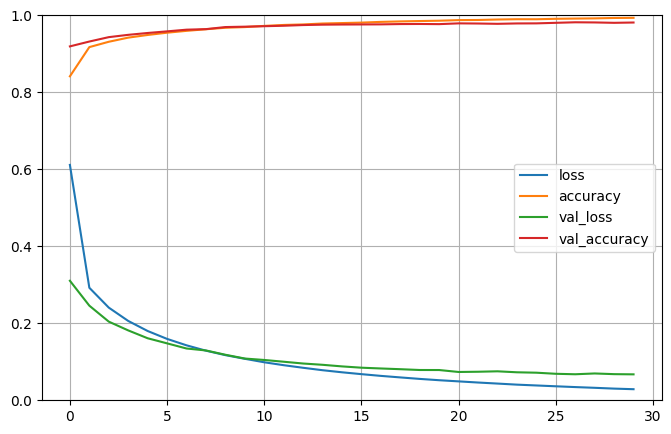

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9780


[0.07142221927642822, 0.9779999852180481]

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 112ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

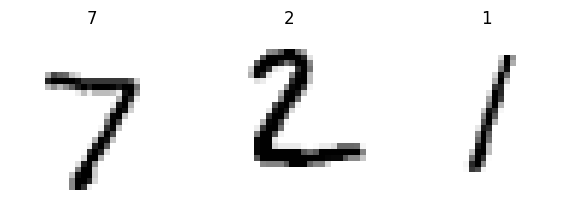

In [14]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


In [15]:
new_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

new_model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
new_history = new_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2024-05-21 13:36:44.318208: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 19s 9ms/step - loss: 0.6457 - accuracy: 0.8055 - val_loss: 0.2492 - val_accuracy: 0.9308
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3699 - accuracy: 0.8883 - val_loss: 0.1892 - val_accuracy: 0.9454
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3076 - accuracy: 0.9071 - val_loss: 0.1557 - val_accuracy: 0.9556
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2699 - accuracy: 0.9190 - val_loss: 0.1383 - val_accuracy: 0.9590
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2454 - accuracy: 0.9255 - val_loss: 0.1260 - val_accuracy: 0.9640
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2251 - accuracy: 0.9313 - val_loss: 0.1155 - val_accuracy: 0.9662
Epoch 7/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2089 - accuracy: 0.9365 - val_loss: 0.1061 - val_ac

In [18]:
models_type = ['model #1', 'model #2']
models_history = [(model, history), (new_model, new_history)]

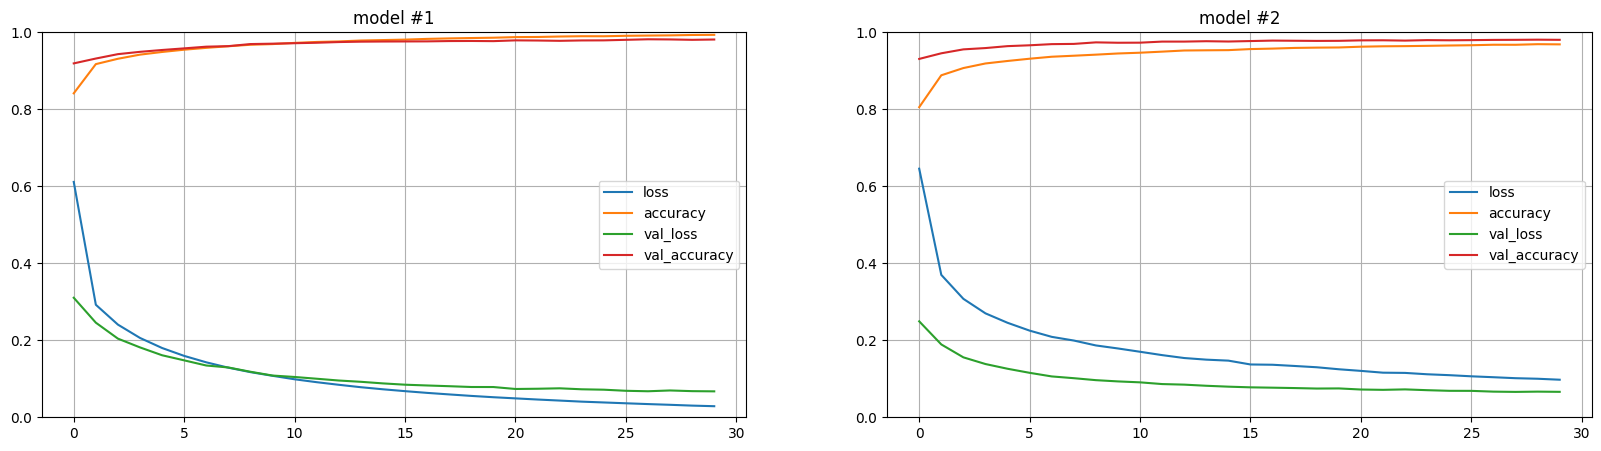

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for i, (model, history) in enumerate(models_history):
    pd.DataFrame(history.history).plot(ax=axs[i])
    axs[i].set_title(models_type[i])
    axs[i].set_ylim(0, 1)
    axs[i].grid(True)
    axs[i].legend()

In [22]:
df = pd.DataFrame(columns=["model", "accuracy"])

for i, (model, history) in enumerate(models_history):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    df.loc[i] = [models_type[i], accuracy]

df

313/313 [==============================] - 1s 4ms/step


,model,accuracy
0,model #1,0.9780
1,model #2,0.9817


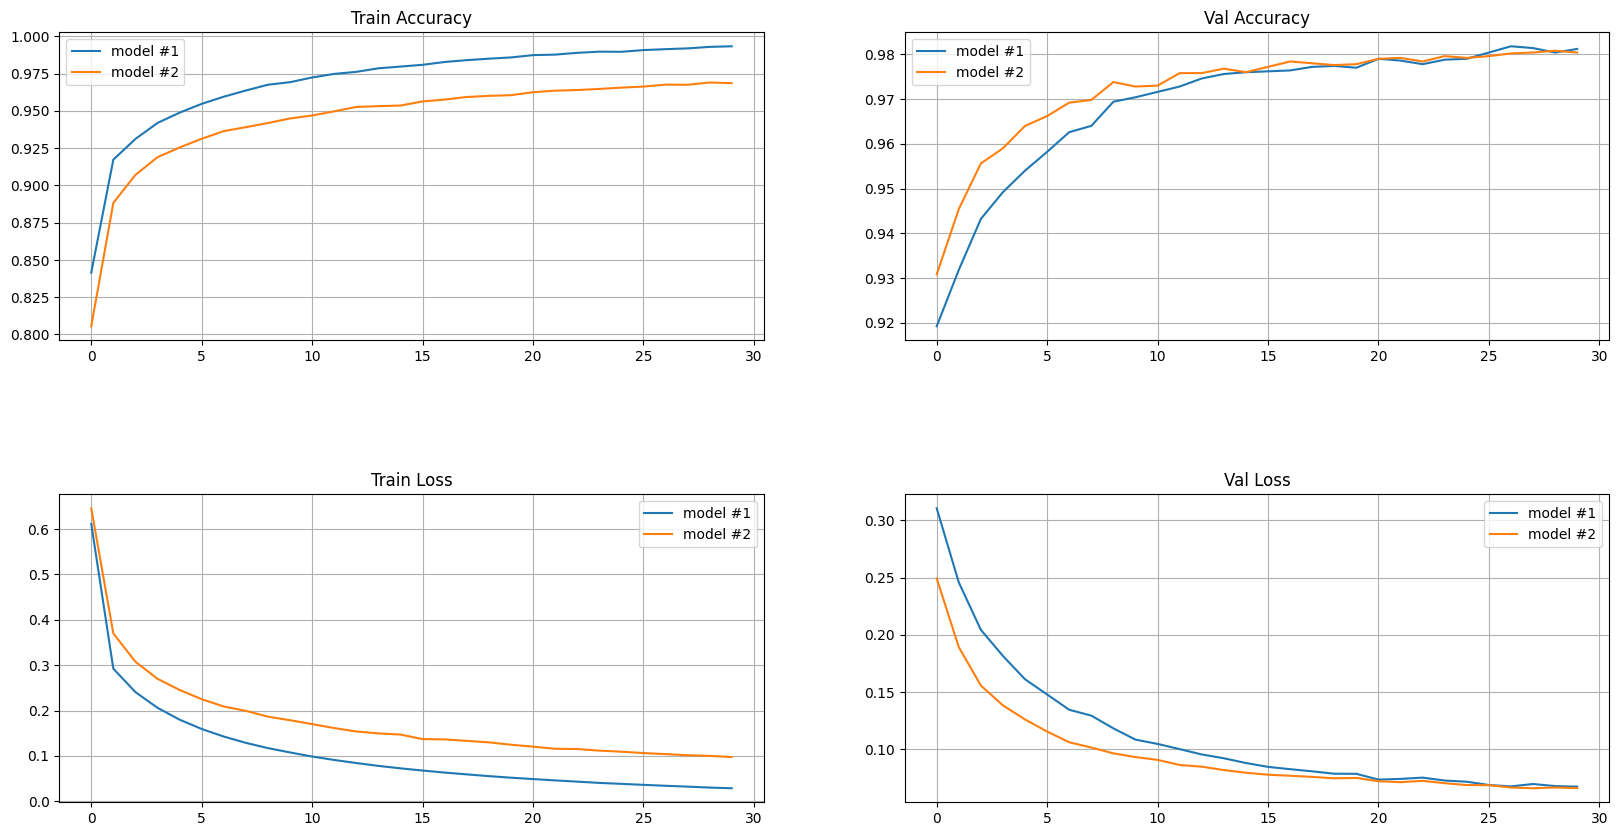

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, (_, history) in enumerate(models_history):
    axs[0][0].plot(history.history['accuracy'], label=f'{models_type[i]}')
    axs[0][1].plot(history.history['val_accuracy'], label=f'{models_type[i]}')
    axs[1][0].plot(history.history['loss'], label=f'{models_type[i]}')
    axs[1][1].plot(history.history['val_loss'], label=f'{models_type[i]}')

axs[0][0].set_title('Train Accuracy')
axs[0][1].set_title('Val Accuracy')
axs[1][0].set_title('Train Loss')
axs[1][1].set_title('Val Loss')

for ax in axs.flatten():
    ax.legend()
    ax.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()